# GRIP | The Sparks Foundation

## Author Name : Dinesh J, Data Science & Business Analytics Intern

## Prediction using Decision Tree Algorithm (Level - Intermediate)

#### Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Meachine Learning and Performance measure Libraries

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Load our IRIS Data set into iris_data dataframe

In [3]:
iris_data = pd.read_csv('Iris.csv')

Print top of the iris_data

In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Print the shape of the iris_data

In [5]:
iris_data.shape

(150, 6)

Print the information of iris_data

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The below table represents the basic statistical measures of iris_data

In [7]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


The iris_data set does not contains any null value. So it is a such a clean data

In [8]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualization

#### Pair Plot

<Figure size 720x864 with 0 Axes>

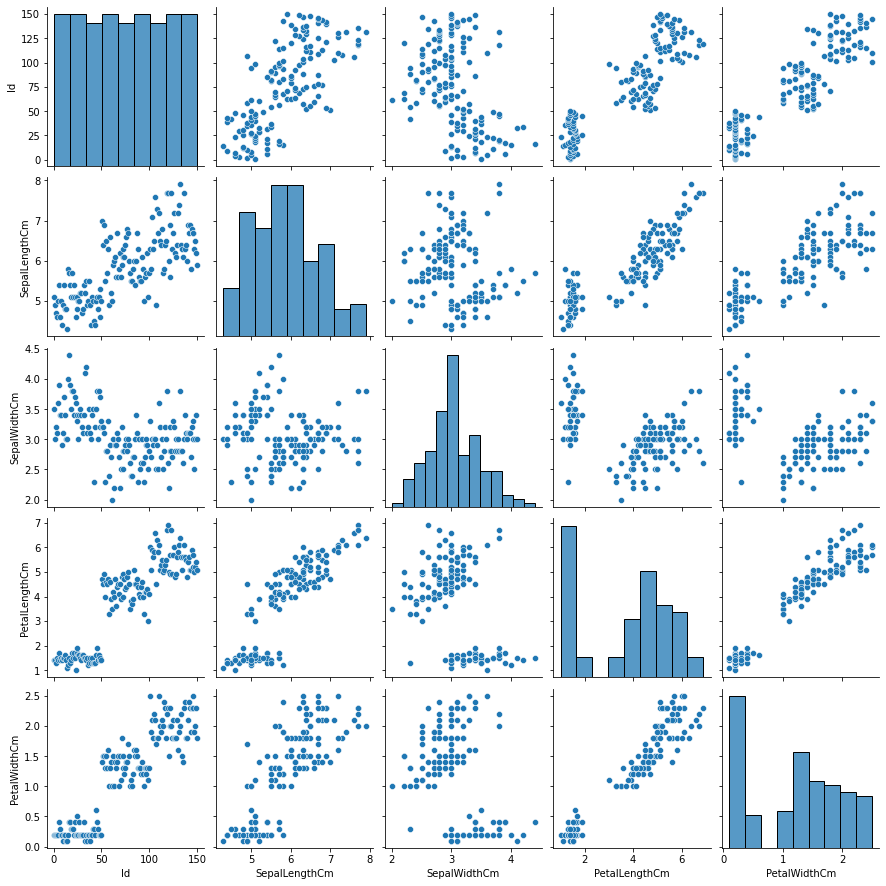

In [10]:
plt.figure(figsize=(10,12))
sns.pairplot(iris_data)
plt.show()

#### Heat Map

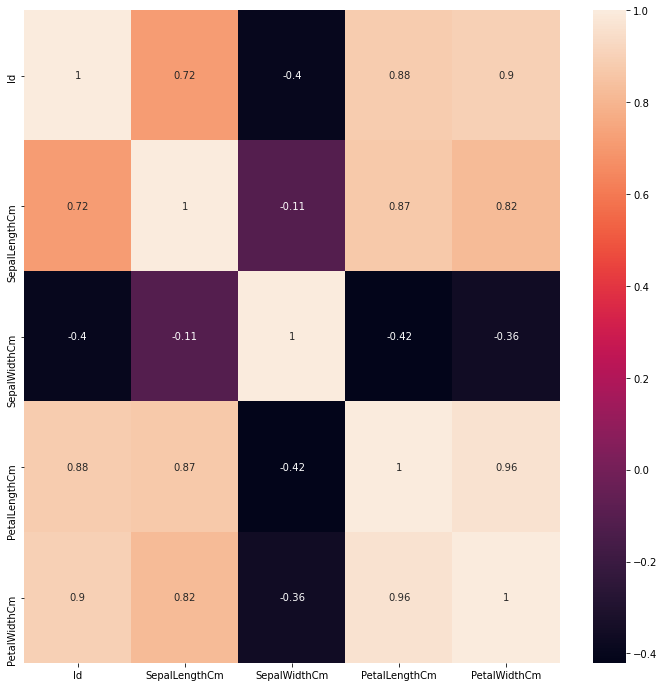

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(iris_data.corr(), annot = True)
plt.show()

#### Violinplot

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

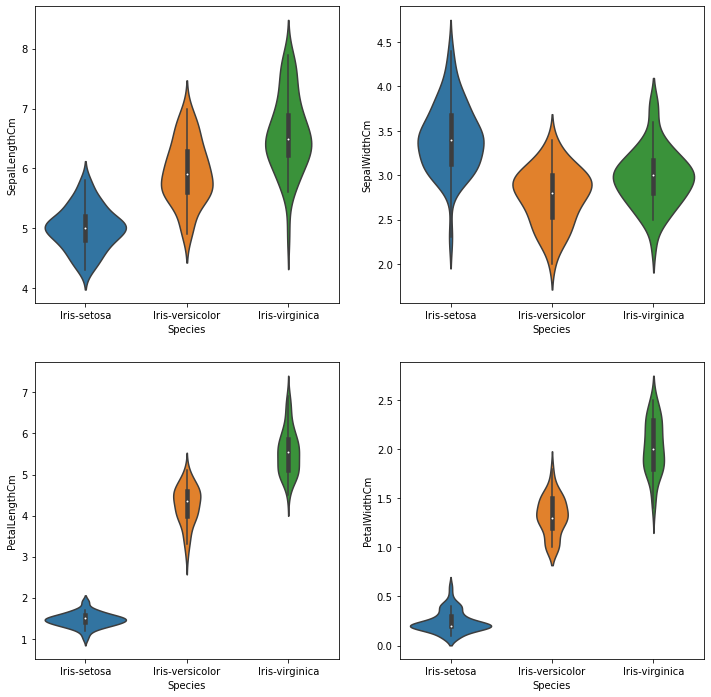

In [17]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris_data)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris_data)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris_data)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris_data)

#### Box Plot

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

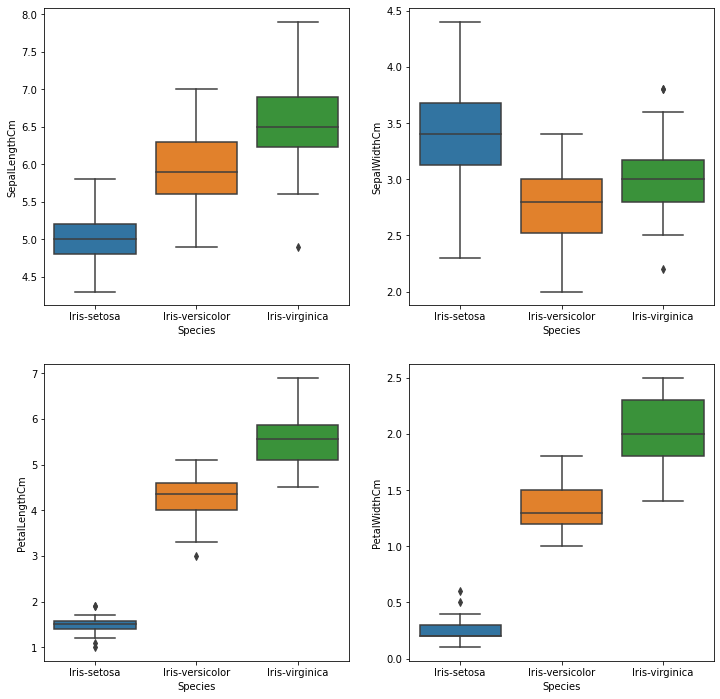

In [22]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = iris_data)
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = iris_data)
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris_data)
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = iris_data)

### Encoding Categorical Column

In [26]:
iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [27]:
species_codes = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
iris_data['species_codes'] = iris_data.Species.map(species_codes)

In [28]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_codes
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


#### The species categorical column is converted into numerical colum which is more helpful when we applying our Machine Learning algorithm

### Input and Target Columns
#### Let's identify the input and target columns.

In [38]:
input_cols = list(iris_data)[1:-2]

In [39]:
print(input_cols)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [40]:
target_col = "Species"

In [41]:
print(target_col)

Species


In [42]:
X = iris_data[input_cols].copy()
y = iris_data[target_col].copy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [45]:
model = DecisionTreeClassifier(random_state=42)

In [46]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### An optimal decision tree has been created using the training data

### Evaluation
#### Lets evaluate the decision tree using the accuracy score

In [48]:
pred = model.predict(X_train)
pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
   

In [49]:
accuracy_score(pred, y_train)

1.0

#### Our model gives 100% accuracy score for the given dataset.

#### The decision tree also returns the probabilities for each prediction

In [51]:
probs = model.predict_proba(X_train)
probs

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

#### Seems like the decision tree is quite confident about its predictions. We can make predictions and compute accuracy in one step usin model.score

In [52]:
model.score(X_test,y_test)

0.9555555555555556

#### Although the training accuracy is 100%, the accuracy on the validation set is  about 95%

###  Decision Tree Visualization

#### We can visualize the decision tree learned from the training data.

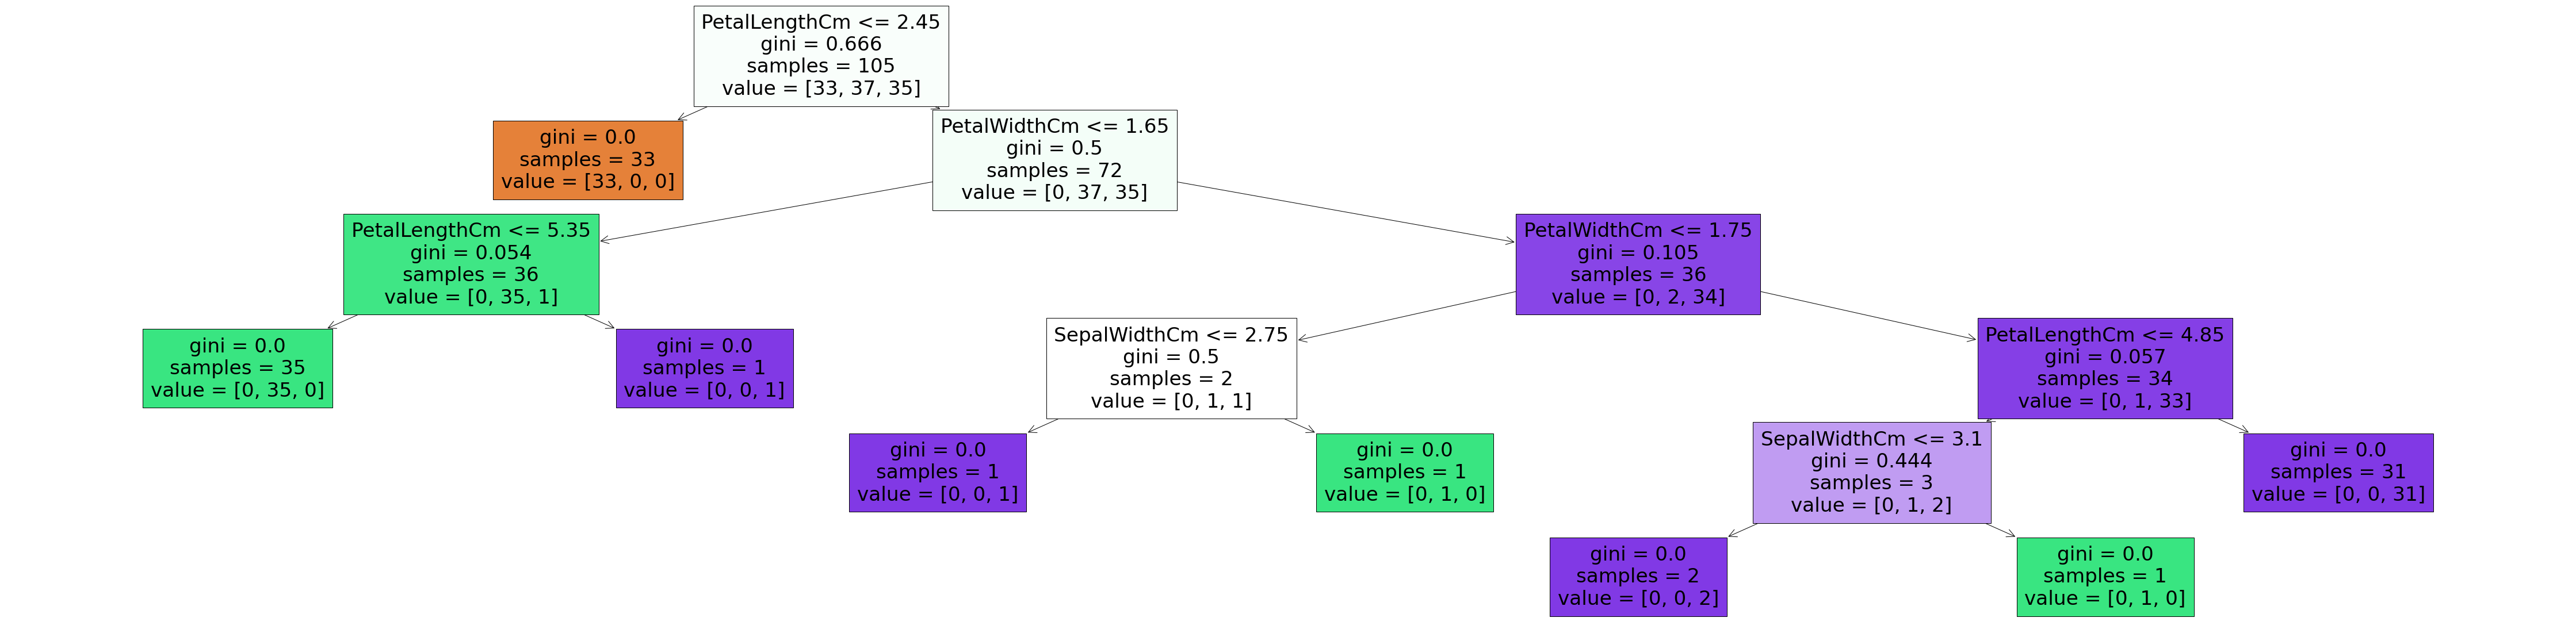

In [61]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=5, filled=True);

#### Let's check the depth of the tree that was created.

In [60]:
model.tree_.max_depth

5

#### We can also display the tree as text, which can be easier to follow for deeper trees.

In [63]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text)

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.65
|   |   |--- PetalLengthCm <= 5.35
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.65
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- SepalWidthCm <= 2.75
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  2.75
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalLengthCm >  4.85
|   |   |   |   |--- class: Iris-virginica



### Feature Importance
#### Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [64]:
model.feature_importances_

array([0.        , 0.03336965, 0.52205215, 0.4445782 ])

#### Let's turn this into a dataframe and visualize the most important features.

In [65]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [67]:
importance_df.head()

,feature,importance
2,PetalLengthCm,0.522052
3,PetalWidthCm,0.444578
1,SepalWidthCm,0.033370
0,SepalLengthCm,0.000000


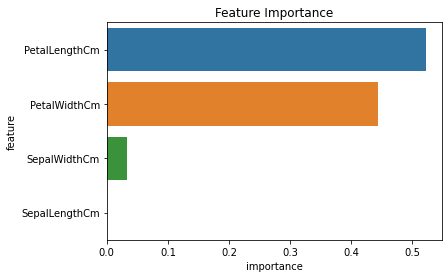

In [68]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(), x='importance', y='feature');

#### From the above observation PatalLength is very important features in the IRIS Dataset.

### Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as regularlization.

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

max_depth

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [69]:
max_depth_model = DecisionTreeClassifier(max_depth=3,random_state=42)

In [71]:
max_depth_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [72]:
max_depth_model.score(X_train,y_train)

0.9809523809523809

In [73]:
max_depth_model.score(X_test,y_test)

0.9555555555555556

In [74]:
max_depth_model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [74]:
max_depth_model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

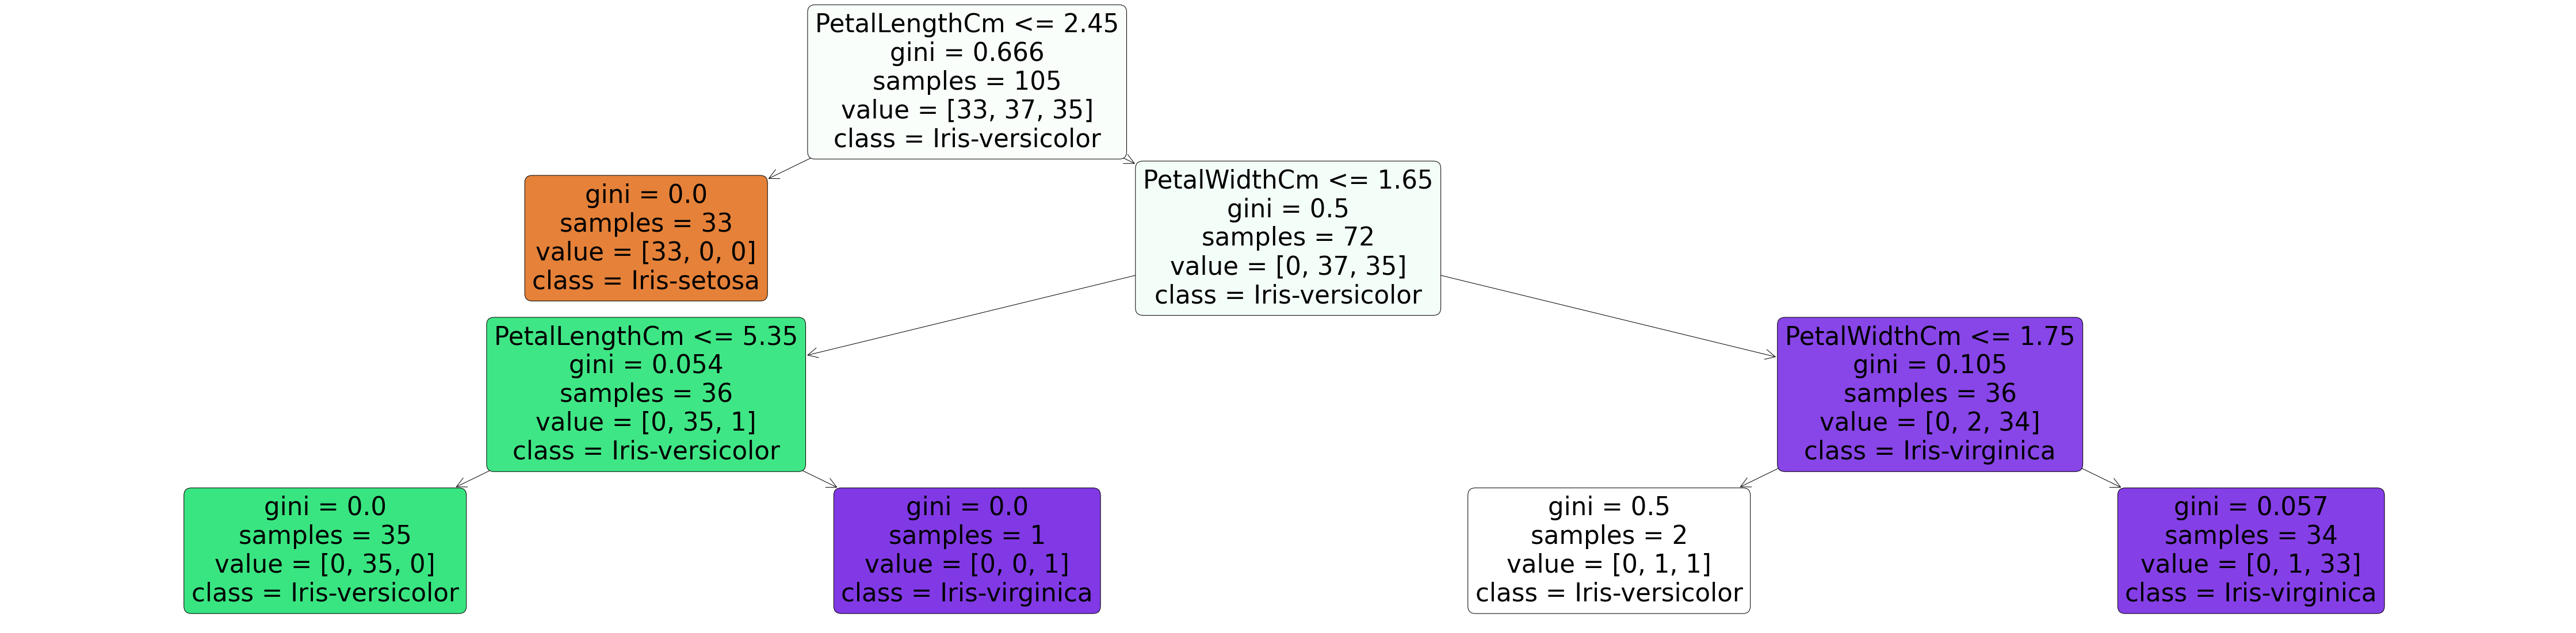

In [75]:
plt.figure(figsize=(80,20))
plot_tree(max_depth_model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [76]:
print(export_text(max_depth_model, feature_names=list(X_train.columns)))

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.65
|   |   |--- PetalLengthCm <= 5.35
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.65
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- class: Iris-virginica



max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [84]:
max_leaf_model = DecisionTreeClassifier(max_leaf_nodes= 7,random_state=42)

In [85]:
max_leaf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=42)

In [86]:
max_leaf_model.score(X_train,y_train)

0.9904761904761905

In [87]:
max_leaf_model.score(X_test,y_test)

0.9555555555555556

In [88]:
max_leaf_model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

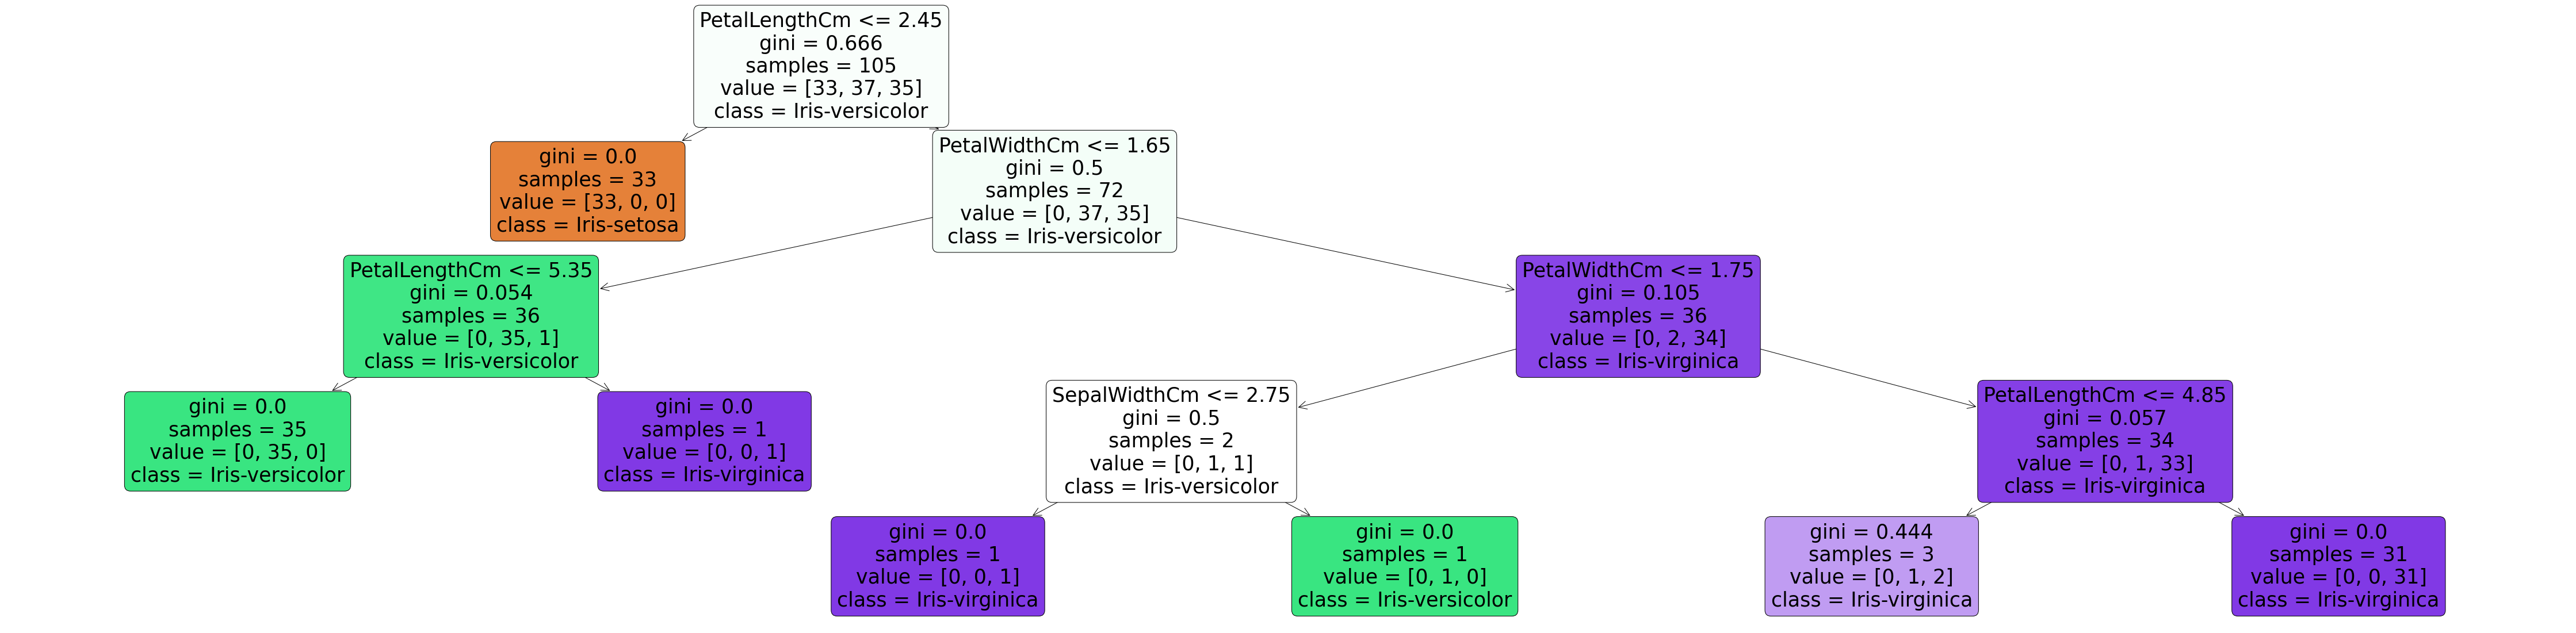

In [89]:
plt.figure(figsize=(80,20))
plot_tree(max_leaf_model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

### Conclusion

Decision Tree Classifier gives 100% accuracy score for our IRIS dataset. 

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually.

By tuning hyperparameters such as max_depth and max_leaf_nodes parameters our Decision Tree Classifier produces the very good accuracy score as 99%.

We can conclude that Decision Tree Classifier is one of the best algorithm for IRIS Dataset classification. 